In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function for getting rid of repeated isteps *

In [2]:
def consecutivity(lst):
    f = open('A9.9Ys1.0e7To0.11_time.txt', "r")
    content = f.readlines()
    f.close()
    istep = []
    consecutive_list = []
    y = 0
    for i in range(len(content)):
        x = content[i].split()
        istep.append(x[0])
    del istep[0]
    istep_num = ([float(y) for y in istep])
    for i in range(len(istep_num)):
        x = istep_num[i]
        if x == y+1 or x == 0:
            consecutive_list.append(lst[i])
            y = istep_num[i]
        else:
            pass
    return(consecutive_list)

# Time average function *

In [3]:
def Time_Average(float_list):
    f = open('A9.9Ys1.0e7To0.11_time.txt', "r")
    content = f.readlines()
    f.close()
    time = [] 
    delta_tn = [] #$t_{n+1}-t_{n}$ list
    Fn = [] #Fn represents the function of $\fracT_{{n+1}+T_{n}}{2}$ list but for arbitary variable insted of T_{n}
    integrand = [] #$t_{n+1}-t_{n}$ * \fracT_{{n+1}+T_{n}}{2}$ list
    for i in range(len(content)):
        v = content[i].split()
        time.append(v[1])
    del time[0]
    time = ([float(y) for y in time])
    time_con = consecutivity(time)
    for i in range(len(float_list)-1):
        d = (time_con[i+1] - time_con[i])
        delta_tn.append(d)
        F = (float_list[i+1] + float_list[i])/2
        Fn.append(F)
    for num1, num2 in zip(delta_tn, Fn):
        integrand.append(num1 * num2)
    sum_integrand = sum(integrand)
    float_list_avg = (1/(time_con[-1]-time_con[0]))*sum_integrand
    return float_list_avg

# Time average of mean temperature, and heat flux at surface and CMB *

In [4]:
f = open('A9.9Ys1.0e7To0.11_time.txt', "r") #Time average code final
                                            #Change the file name to change the case
content = f.readlines()
f.close()
Tmean_str = []
F_top_str = []
F_bot_str = [] 
for i in range(len(content)):
    x = content[i].split() #x will be a string list of a line in content
    Tmean_str.append(x[5]) #Column 5 for the mean temperature
    F_top_str.append(x[2])
    F_bot_str.append(x[3])
del Tmean_str[0]
del F_top_str[0]
del F_bot_str[0]
Tmean_num = ([float(a) for a in Tmean_str])
F_top_num = ([float(b) for b in F_top_str])
F_bot_num = ([float(c) for c in F_bot_str])

Tmean_con = consecutivity(Tmean_num) #Getting rid of repeated steps
F_top_con = consecutivity(F_top_num)
F_bot_con = consecutivity(F_bot_num)

Tmean_avg = Time_Average(Tmean_con) #Time average of non-dimensional mean temperature
F_top_avg = Time_Average(F_top_con) #Time average of non-dimensional heat flux at the surface
F_bot_avg = Time_Average(F_bot_con) #Time average of non-dimensional heat flux at the CMB
#print(len(Tmean_con), len(Tmean_num))
Rh_avg = 3*((F_top_avg - (F_bot_avg)*(0.55**2))/(1+0.55+(0.55**2))) #Calculated internal heating rate code final
print('Calculated internal heating rate:', Rh_avg)
print('Time average of non-dimensional mean temperature:',Tmean_avg)
print('Time average of non-dimensional heat flux at the surface:',F_top_avg)
print('Time average of non-dimensional heat flux at the CMB:',F_bot_avg)

Calculated internal heating rate: 19.228598993792176
Time average of non-dimensional mean temperature: 0.5494186330242169
Time average of non-dimensional heat flux at the surface: 15.710018077102431
Time average of non-dimensional heat flux at the CMB: 12.68217586259756


# Internal Heating Rate in each istep *

In [16]:
f = open('A6.6Ys2.5e7To0.11_time.txt', "r")
content = f.readlines()
f.close()
Time_str = []
F_top_str = []
F_bot_str = []
Rh = []
for i in range(len(content)):
    x = content[i].split()
    Time_str.append(x[1])
    F_top_str.append(x[2])
    F_bot_str.append(x[3])
del Time_str[0]
del F_top_str[0]
del F_bot_str[0]
Time_num = ([float(a) for a in Time_str])
F_top_num = ([float(b) for b in F_top_str])
F_bot_num = ([float(c) for c in F_bot_str])
Time_con = consecutivity(Time_num)
F_top_con = consecutivity(F_top_num)
F_bot_con = consecutivity(F_bot_num)
for i in range(len(F_bot_con)):
    Rh_element = 3*((F_top_con[i] - (F_bot_con[i])*(0.55**2))/(1+0.55+(0.55**2)))
    Rh.append(Rh_element)
#Time_con3 = Time_con
#Rh3 = Rh

Text(0.5, 1.0, 'Non-dimensional Time Evolution of Non-dimensional Internal Heating Rate')

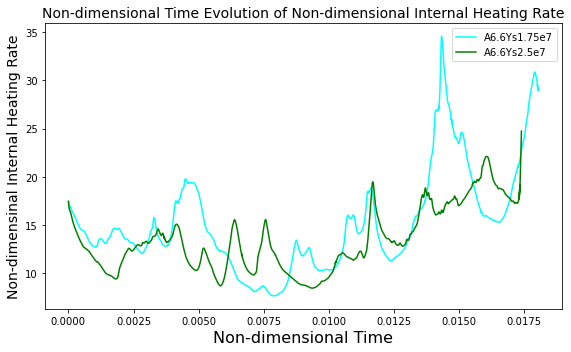

In [19]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(Time_con1, Rh1, color='blue', label = "A6.6Ys1.0e7")
#plt.plot(Time_con2, Rh2, color='cyan', label = "A6.6Ys1.75e7")
#plt.plot(Time_con3, Rh3, color='green', label = "A6.6Ys2.5e7")
#plt.plot(Time_con4, Rh4, color='magenta', label = "A8.8Ys1.0e7"))
#plt.plot(Time_con5, Rh5, color='red', label = "A9.9Ys1.0e7"))
#plt.axhline(y=Rh_avg, color='black', label = "$Time\ Average\ R_{h}$ = 19.2", ls = '--')
plt.legend()
plt.xlabel("Non-dimensional Time", fontsize=16)
plt.ylabel("Non-dimensinal Internal Heating Rate", fontsize=14)
plt.title("Non-dimensional Time Evolution of Non-dimensional Internal Heating Rate", fontsize=14)
#plt.savefig("Different non-dimensional activation energy with T cutoff.png")